### Importação dos dados



In [37]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

# DataFrame com o número da loja
loja  ['Loja'] = 1
loja2 ['Loja'] = 2
loja3 ['Loja'] = 3
loja4 ['Loja'] = 4

# Concatena tudo
df_all = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Verificar
df_all.head()

print(df_all['Loja'].value_counts())

Loja
1    2359
2    2359
3    2359
4    2358
Name: count, dtype: int64


#1. Análise do faturamento


Faturamento (R$):
 Loja           Preço
    1 R$ 1.534.509,12
    2 R$ 1.488.459,06
    3 R$ 1.464.025,03
    4 R$ 1.384.497,58


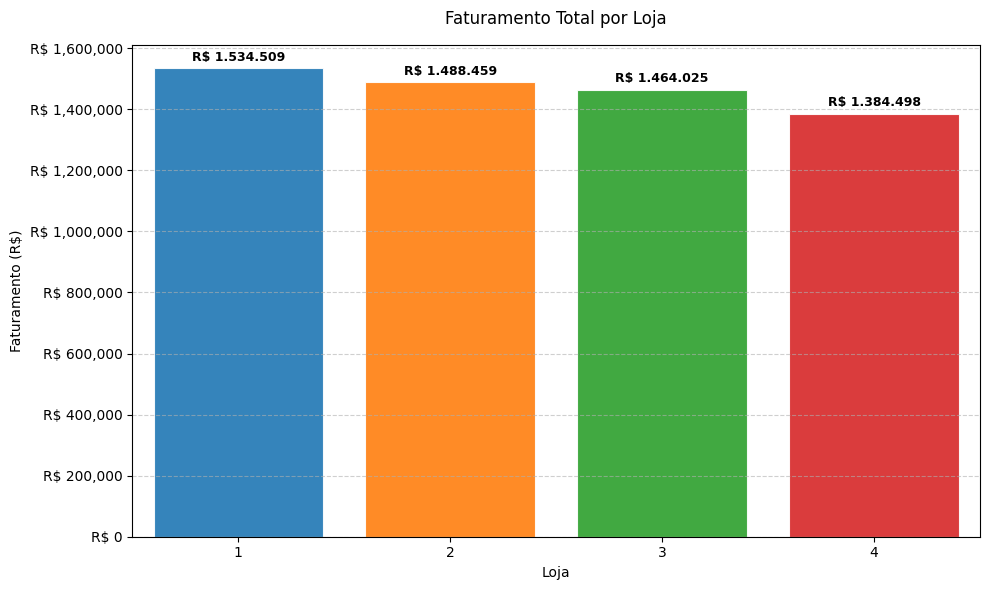

In [28]:
import pandas as pd                           # Importa o pandas para manipulação de dados (DataFrame).
import matplotlib.pyplot as plt               #  Importa o Matplotlib para criação de gráficos.
import matplotlib.ticker as mtick              # Importa utilitários de formatação de eixos (aqui, para moeda).

plt.close('all')                              # Fecha todas as figuras abertas, evitando sobreposição de gráficos antigos.

# Calcula e ordena o faturamento decrescente por loja:
faturamento = (
    df_all                                    #   • usa o DataFrame original
    .groupby('Loja')['Preço']                 #   • agrupa por coluna “Loja” e isola a série “Preço”
    .sum()                                    #   • soma os preços dentro de cada grupo (faturamento total)
    .reset_index()                            #   • transforma “Loja” de índice em coluna novamente
    .sort_values('Preço', ascending=False)    #   • ordena do maior para o menor faturamento
)

# Exibe no console a tabela formatada em reais (R$):
print("Faturamento (R$):")
print(
    faturamento.to_string(
        index=False,                         #   • não mostra o índice na saída
        formatters={                         #   • formata cada valor de “Preço”:
            'Preço': lambda x: f"R$ {x:,.2f}"      #     – separador de milhares com vírgula e 2 casas decimais
                           .replace(",", "X")      #     – troca ',' por 'X' temporariamente
                           .replace(".", ",")      #     – troca '.' por vírgula (decimal BR)
                           .replace("X", ".")      #     – retorna os pontos como separadores de milhares
        }
    )
)

# Prepara uma paleta de cores para as barras:
cmap = plt.get_cmap('tab10')                #   • acessa a paleta “tab10” do Matplotlib
cores = cmap.colors[:len(faturamento)]      #   • pega tantas cores quantas houverem de lojas

# Cria a figura e o eixo único para plot:
fig, ax = plt.subplots(figsize=(10, 6))     #   • define tamanho de 10×6 polegadas

# Desenha as barras coloridas:
bars = ax.bar(
    faturamento['Loja'],                     #   • posições no eixo X
    faturamento['Preço'],                    #   • alturas das barras
    color=cores,                             #   • lista de cores distinta para cada barra
    alpha=0.9,                               #   • transparência levemente reduzida
    edgecolor='white',                       #   • borda branca em volta de cada barra
    linewidth=0.8                            #   • espessura da borda
)

# Ajusta ticks e limites no eixo X:
lojas = faturamento['Loja']                 #   • extrai a lista de lojas (ex.: [1,2,3,4])
ax.set_xticks(lojas)                        #   • define exatamente esses valores como ticks
ax.set_xlim(lojas.min() - 0.5, lojas.max() + 0.5)  # • reduz margens em 0.5 para “encaixar” barras

# Formata o eixo Y em Real brasileiro:
ax.yaxis.set_major_formatter(
    mtick.StrMethodFormatter('R$ {x:,.0f}') #   • sem casas decimais, estilo “R$ 1.234”
)

# Anota o valor exato no topo de cada barra:
max_val = faturamento['Preço'].max()        #   • encontra o maior faturamento (para definir offset)
for bar in bars:
    h = bar.get_height()                    #   • altura da barra atual
    ax.text(
        bar.get_x() + bar.get_width()/2,    #     – posição X: centro da barra
        h + max_val * 0.01,                 #     – posição Y: logo acima, +1% do máximo
        f"R$ {h:,.0f}"                      #     – texto formatado “R$ X”
         .replace(",", "X")
         .replace(".", ",")
         .replace("X", "."),
        ha='center',                        #     – alinhamento horizontal ao centro
        va='bottom',                        #     – alinhamento vertical embaixo do texto
        fontsize=9,                         #     – tamanho de fonte das anotações
        fontweight='bold'                   #     – texto em negrito para destaque
    )

# Ajustes finais de rótulos, título e grid:
ax.set_title('Faturamento Total por Loja', pad=15)  # • título com espaçamento extra
ax.set_xlabel('Loja')                             # • rótulo do eixo X
ax.set_ylabel('Faturamento (R$)')                  # • rótulo do eixo Y
ax.grid(axis='y', linestyle='--', alpha=0.6)       # • grid horizontal pontilhada

plt.xticks(rotation=0)                             # • ticks X sem rotação
plt.tight_layout()                                 # • ajusta margens automaticamente
plt.show()                                         # • exibe o gráfico na tela


# 2. Vendas por Categoria


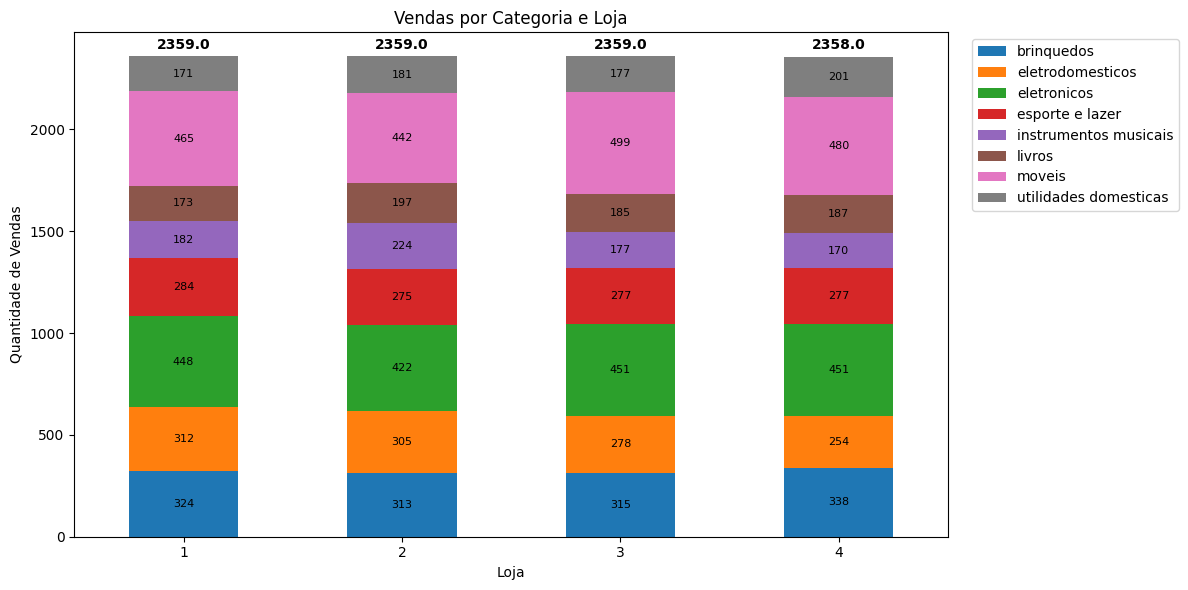

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# pivot para o empilhado
vendas_pivot = vendas_cat.pivot_table(
    index='Loja',
    columns='Categoria do Produto',
    values='Contagem',
    fill_value=0
)

# cria figura e eixos
fig, ax = plt.subplots(figsize=(12, 6))

# plot empilhado
vendas_pivot.plot(kind='bar', stacked=True, ax=ax)

# anota cada segmento
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)

# calcula totais por loja e anota acima da pilha
totais = vendas_pivot.sum(axis=1)
for idx, total in enumerate(totais):
    ax.text(
        idx,                          # posição x: índice da loja
        total + max(totais)*0.01,     # posição y: um pequeno offset acima do topo
        str(total),                   # texto do total
        ha='center', va='bottom',     # centralizado horizontal, colado embaixo do texto
        fontsize=10, fontweight='bold'
    )

# demais ajustes
ax.set_xlabel('Loja')
ax.set_ylabel('Quantidade de Vendas')
ax.set_title('Vendas por Categoria e Loja')
ax.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



# 3. Média de Avaliação das Lojas

Avaliação Média:
 Loja Avaliação da compra
    1                3.98
    2                4.04
    3                4.05
    4                4.00


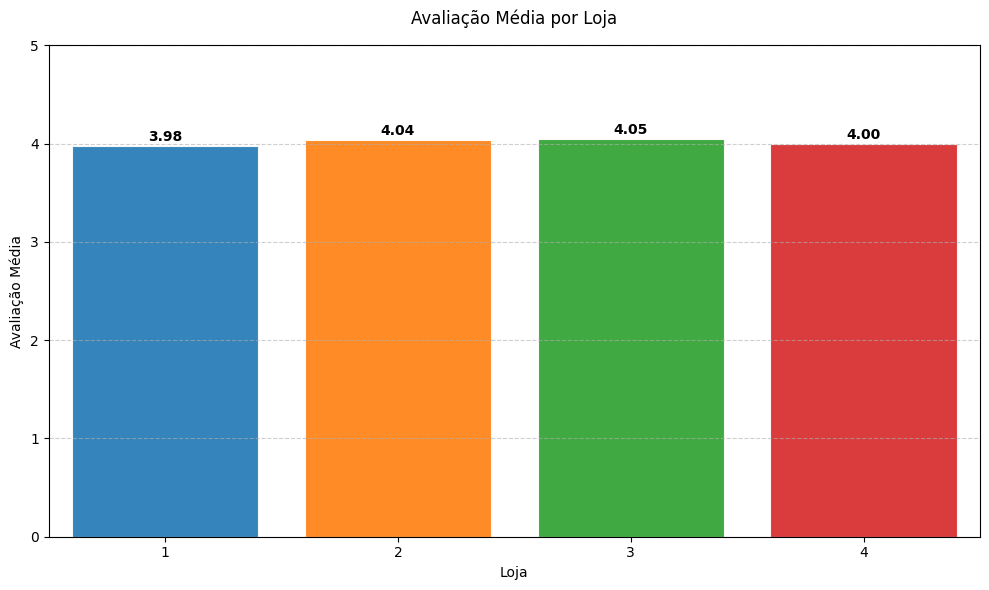

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Fecha todas as figuras abertas
plt.close('all')

# Calcular a média de avaliação e ordenar por loja
media_avaliacao = (
    df_all
    .groupby('Loja')['Avaliação da compra']
    .mean()
    .reset_index()
    .sort_values('Loja')
)

# Imprimir tabela formatada
print("Avaliação Média:")
print(
    media_avaliacao.to_string(
        index=False,
        formatters={'Avaliação da compra': lambda x: f"{x:.2f}"}
    )
)

# Preparar paleta de cores qualitativa
cmap = plt.get_cmap('tab10')
cores = cmap.colors[:len(media_avaliacao)]  # uma cor diferente para cada barra

# Criar figura e eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar barras coloridas
bars = ax.bar(
    media_avaliacao['Loja'],
    media_avaliacao['Avaliação da compra'],
    color=cores,
    edgecolor='white',
    linewidth=0.8,
    alpha=0.9
)

# Ajustar ticks e limites do eixo X para lojas 1–4
lojas = media_avaliacao['Loja']
ax.set_xticks(lojas)
ax.set_xlim(lojas.min() - 0.5, lojas.max() + 0.5)

# Definir limites e grid no eixo Y (escala 1 a 5)
ax.set_ylim(0, 5)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Anotar cada barra com seu valor médio
max_val = media_avaliacao['Avaliação da compra'].max()
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + 0.02,             # offset fixo para não encostar no topo
        f"{h:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Rótulos e título
ax.set_title('Avaliação Média por Loja', pad=15)
ax.set_xlabel('Loja')
ax.set_ylabel('Avaliação Média')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()




# 4. Produtos Mais e Menos Vendidos

In [18]:
prod_counts = (
    df_all
    .groupby(['Loja','Produto'])
    .size()
    .reset_index(name='Contagem')
)

# Top 3+- por loja
top3 = prod_counts.sort_values(['Loja','Contagem'], ascending=[True,False]).groupby('Loja').head(3)
bot3 = prod_counts.sort_values(['Loja','Contagem'], ascending=[True,True]).groupby('Loja').head(3)

print('Top 3+ Produtos por Loja:')
print(top3.to_string(index=False))
print('\nTop 3- Produtos por Loja:')
print(bot3.to_string(index=False))


Top 3+ Produtos por Loja:
 Loja                  Produto  Contagem
    1            Guarda roupas        60
    1              Micro-ondas        60
    1            TV Led UHD 4K        60
    2 Iniciando em programação        65
    2              Micro-ondas        62
    2                  Bateria        61
    3            Kit banquetas        57
    3                Cama king        56
    3           Mesa de jantar        56
    4                 Cama box        62
    4                 Faqueiro        59
    4                Cama king        56

Top 3- Produtos por Loja:
 Loja           Produto  Contagem
    1      Celular ABXY        33
    1           Headset        33
    1 Panela de pressão        35
    2 Jogo de tabuleiro        32
    2        Impressora        34
    2    Mesa de jantar        34
    3  Blocos de montar        35
    3     Jogo de copos        36
    3       Micro-ondas        36
    4          Guitarra        33
    4     Guarda roupas        34
    4 

# 5. Frete Médio por Loja


Frete Médio (R$):
 Loja    Frete
    1 R$ 34,69
    2 R$ 33,62
    3 R$ 33,07
    4 R$ 31,28


<ipython-input-26-003e24deb056>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')                       # paleta com cores


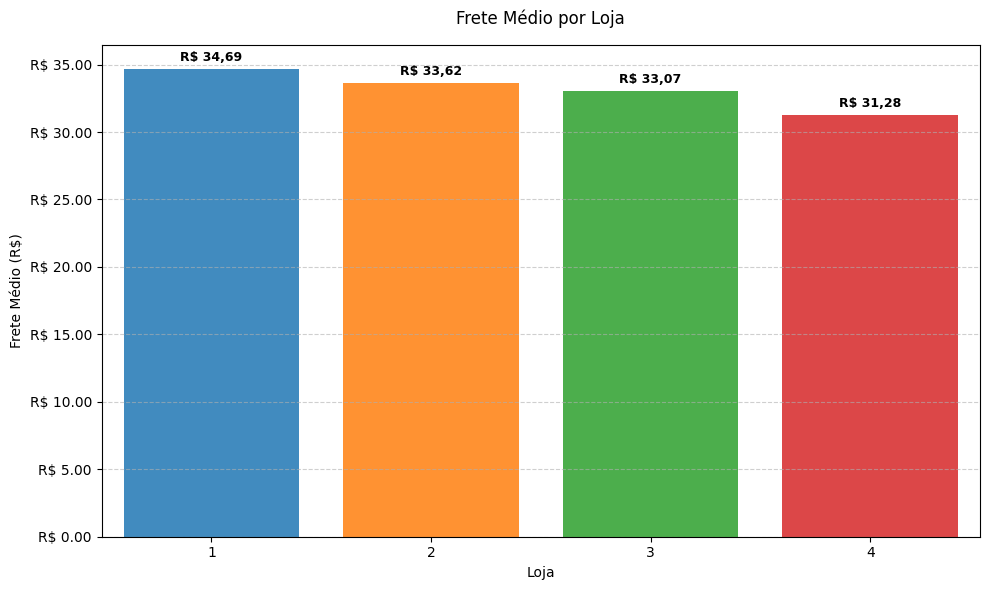

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Fecha tudo que estiver aberto
plt.close('all')

# Calcular frete médio por loja
frete_medio = (
    df_all
    .groupby('Loja')['Frete']
    .mean()
    .reset_index()
    .sort_values('Loja')
)

# Mostrar tabela formatada em R$
print("Frete Médio (R$):")
print(
    frete_medio.to_string(
        index=False,
        formatters={
            'Frete': lambda x: f"R$ {x:,.2f}"
                             .replace(",", "X")
                             .replace(".", ",")
                             .replace("X", ".")
        }
    )
)

# Prepara paleta de cores
import matplotlib.cm as cm
cmap = cm.get_cmap('tab10')                       # paleta com cores
cores = [cmap(i) for i in range(len(frete_medio))]

# Cria figura e eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Plota barras com cores distintas
bars = ax.bar(
    frete_medio['Loja'],
    frete_medio['Frete'],
    color=cores,      # cada barra com uma cor diferente
    alpha=0.85
)

# Formata eixo Y como moeda BR
ax.yaxis.set_major_formatter(
    mtick.StrMethodFormatter('R$ {x:,.2f}')
)

# Ajusta ticks e limites do eixo X
lojas = frete_medio['Loja']
ax.set_xticks(lojas)
ax.set_xlim(lojas.min() - 0.5, lojas.max() + 0.5)

#  Anota valor médio sobre cada barra
max_val = frete_medio['Frete'].max()
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + max_val * 0.01,
        f"R$ {h:,.2f}"
         .replace(",", "X")
         .replace(".", ",")
         .replace("X", "."),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# Ajustes finais
ax.set_title('Frete Médio por Loja', pad=15)
ax.set_xlabel('Loja')
ax.set_ylabel('Frete Médio (R$)')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




# 6. Conclusão e Recomendação


In [38]:
# Identifica a loja com pior desempenho (menor faturamento)
loja_pior = faturamento.loc[faturamento['Preço'].idxmin(), 'Loja']
valor_pior = faturamento['Preço'].min()
avaliacao_pior = media_avaliacao.loc[media_avaliacao['Loja']==loja_pior, 'Avaliação da compra'].values[0]
frete_pior = frete_medio.loc[frete_medio['Loja']==loja_pior, 'Frete'].values[0]

# Exibe um texto de recomendação
print(f"Análise Final")
print(f"- Loja com menor faturamento: **{loja_pior}** (R$ {valor_pior:,.2f})")
print(f"- Avaliação média nesta loja: {avaliacao_pior:.2f}")
print(f"- Frete médio nesta loja: R$ {frete_pior:.2f}\n")

print("Recomendação")
print(f"Com base nos números acima, a loja {loja_pior} é a menos eficiente em gerar receita, "
      "apesar de ter um frete relativamente baixo. Para otimizar recursos e focar nas unidades "
      "com melhor performance, recomenda-se vender a loja citada e concentrar esforços "
      "nas demais lojas, que apresentam faturamento e avaliações superiores.")


Análise Final
- Loja com menor faturamento: **4** (R$ 1,384,497.58)
- Avaliação média nesta loja: 4.00
- Frete médio nesta loja: R$ 31.28

Recomendação
Com base nos números acima, a loja 4 é a menos eficiente em gerar receita, apesar de ter um frete relativamente baixo. Para otimizar recursos e focar nas unidades com melhor performance, recomenda-se vender a loja citada e concentrar esforços nas demais lojas, que apresentam faturamento e avaliações superiores.


# 7. Mapa de Dispersão de Vendas por Local


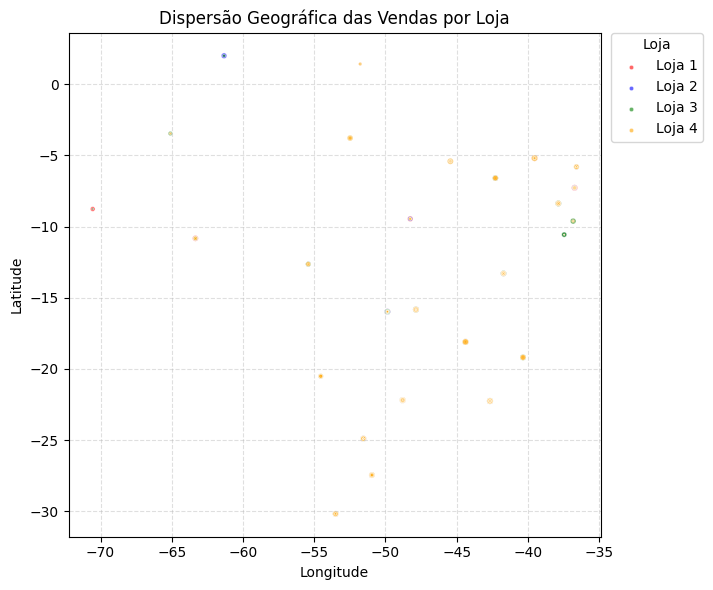

In [24]:
import matplotlib.pyplot as plt

# Fecha possíveis figuras prévias
plt.close('all')

# Define cores por loja (chaves inteiras)
cores = {1: 'red', 2: 'blue', 3: 'green', 4: 'orange'}

# Cria figura e eixo
fig, ax = plt.subplots(figsize=(8, 6))

# Plota cada sub-conjunto
for loja, grupo in df_all.groupby('Loja'):
    ax.scatter(
        grupo['lon'],
        grupo['lat'],
        s=grupo['Preço'] / 200,           # bolhas proporcionais ao preço
        alpha=0.6,
        color=cores.get(loja, 'gray'),    # fallback para cinza se faltar cor
        label=f'Loja {loja}',             # rótulo fica “Loja 1”, etc.
        edgecolors='w',
        linewidth=0.5
    )

# Ajustes de legenda e aspecto
ax.legend(
    title='Loja',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)
ax.set_aspect('equal', adjustable='box')  # mantém escala x=y

# Rótulos e título
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Dispersão Geográfica das Vendas por Loja')

# Grid sutil
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()



# 8. Heatmap de Concentração de Vendas

---




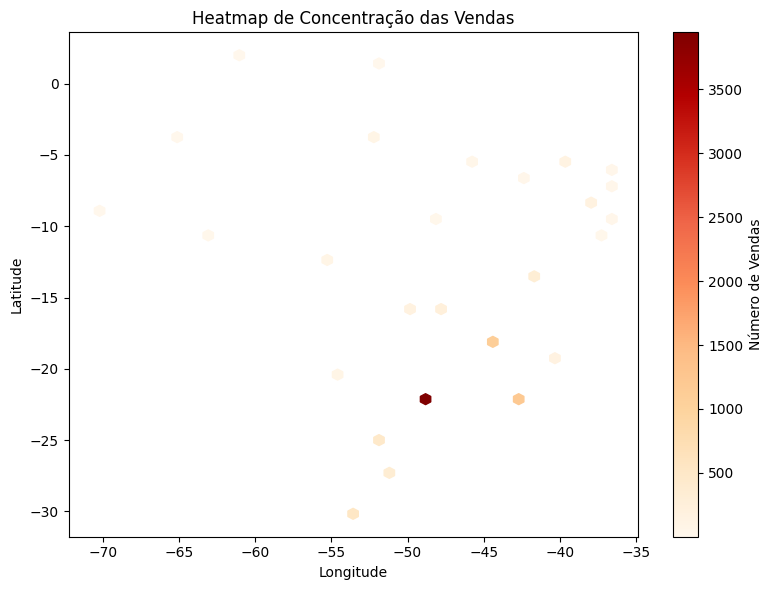

In [ ]:
# Hexbin para ver densidade de pontos de venda
plt.figure(figsize=(8,6))
hb = plt.hexbin(
    df_all['lon'], df_all['lat'],
    gridsize=50,      # controla a resolução do heatmap
    cmap='OrRd',
    mincnt=1
)
plt.colorbar(hb, label='Número de Vendas')
plt.title('Heatmap de Concentração das Vendas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


# 9. Mapa Interativo com Folium


In [ ]:
# Instalação
!pip install folium

import folium
from folium.plugins import HeatMap

# Cria mapa centralizado no centro aproximado dos pontos
centro = [df_all['lat'].mean(), df_all['lon'].mean()]
mapa = folium.Map(location=centro, zoom_start=5)

# Prepara dados para o HeatMap: [lat, lon, peso] (aqui usamos preço como peso)
dados = df_all.groupby(['lat','lon'])['Preço'].sum().reset_index().values.tolist()
HeatMap(dados, radius=15).add_to(mapa)

mapa  # renderiza o mapa interativo no Colab


# 10. Insights Geográficos

---




In [ ]:
# Top estados por volume de vendas
vendas_por_estado = (
    df_all
    .groupby('Local da compra')
    .size()
    .sort_values(ascending=False)
)
print('Top 5 Estados por Número de Vendas:')
print(vendas_por_estado.head(5).to_string())

# faturamento x estado:
faturamento_estado = (
    df_all
    .groupby('Local da compra')['Preço']
    .sum()
    .sort_values(ascending=False)
)
print('\nTop 5 Estados por Faturamento:')
print(faturamento_estado.head(5).to_string())


Top 5 Estados por Número de Vendas:
Local da compra
SP    3943
RJ    1212
MG    1102
RS     534
PR     473

Top 5 Estados por Faturamento:
Local da compra
SP    2419806.94
RJ     771412.90
MG     690814.92
RS     367611.78
PR     307757.16
